<a href="https://colab.research.google.com/github/namita-ach/SDS-Reviews/blob/main/ConfidenceIntervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Tutorial: Understanding Confidence Intervals

In this tutorial, we will explore the concept of Confidence Intervals (CIs) using Python. We will generate a population, take random samples from it, and calculate the confidence intervals for the sample means. This will help us understand how well our sample estimates the true population mean.

---

## 1. Importing Necessary Libraries

First, we need to import the libraries that will help us with data manipulation and visualization.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
import random

## 2. Generating a Population
We will create a random population consisting of integers from 1 to 10,000. We will also calculate the mean of this population.

In [ ]:
population = np.arange(1, 10**4) # Create a population of integers from 1 to 10,000

pop_mean = np.mean(population)  # Calculate the mean of the population

## 3. Sampling Function
Next, we define a function sampling that takes two parameters: sample_size and no_of_samples. T

his function will:
* Take random samples from the population.
* Calculate the mean of each sample.
* Compute the confidence intervals (CIs) for these sample means.
* Count how many times the true population mean falls within these intervals.

In [ ]:
def sampling(sample_size, no_of_samples):
    sample_means = []
    intervals = []
    count = 0
    for i in range(no_of_samples):

        #a sample of size sample_size will be taken
        sample = random.sample(list(population), sample_size)

        #mean of the samples appended to sample_means
        sample_means.append(np.mean(sample))

        #ci contains lower and upper bound of interval with 0.95 confidence
        ci = norm.interval(0.95, np.mean(sample),
                            np.std(sample, ddof =1)/sqrt(sample_size))
        intervals.append(ci)

        #upcount only if pop_mean lies in confidence interval
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count = count + 1

    print('Proportion of CIs Covering Population Mean', count/no_of_samples)
    plt.figure(figsize=(15,5))

    #print the horizontal line which is pop_mean
    plt.hlines(y = pop_mean, xmin = 0, xmax = 100, color ='r')

    #print the sample lines with their means indicated as 'o'
    plt.errorbar(np.arange(0.1, 100, 1), sample_means, fmt = 'o', yerr = [(upp - low)/2 for low, upp in intervals])
    plt.show()

## 4. Running the Sampling Function
Now we can call our sampling function with specific values for sample_size and no_of_samples.

Proportion of CIs covering Pop mean 0.94


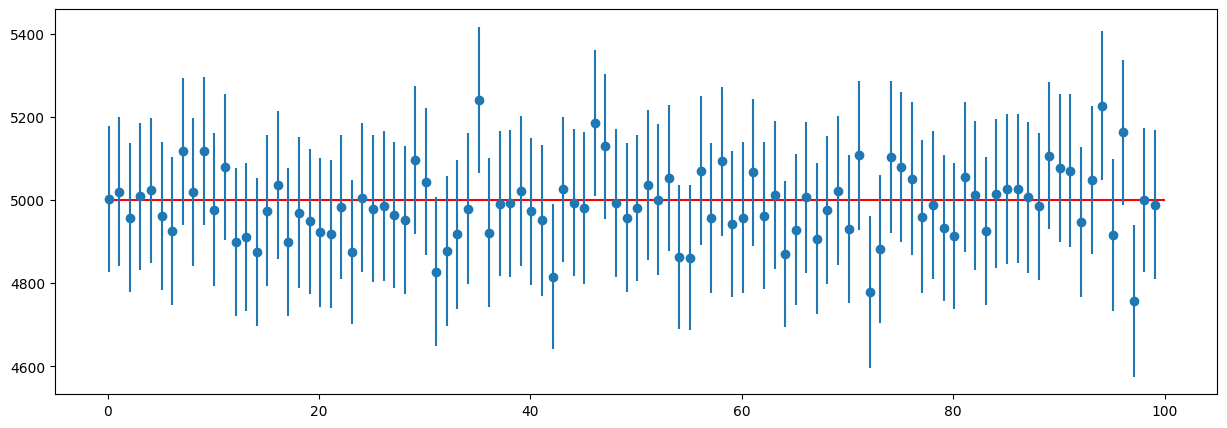

In [ ]:
# Call sampling function with a sample size of 1000 and number of samples as 100
sampling(1000, 100)

## 5. Confidence Interval Calculation Function
Next, we define another function CI that calculates confidence intervals based on different parameters such as required CI level, sample size, and number of samples.

In [ ]:
def CI(pop, ci, samp_size, no_of_samples):
    print("\nFor CI of", ci, "with sample size", samp_size)

    pop_mean = np.mean(pop)  # Calculate actual mean of the population
    print('Actual Mean:', pop_mean)

    samp_means = []  # List to store means of all samples

    for i in range(no_of_samples):
        # Append the mean of each sampled data to samp_means list
        samp_means.append(np.mean(random.sample(pop, samp_size)))

    # Calculate and display mean of sampled means
    print('Mean of Samples:', np.mean(samp_means))

    pop_stdev = np.std(samp_means) / sqrt(samp_size)  # Standard deviation of sampled means
    z = norm.ppf(ci)  # Z-score for given confidence level

    # Calculate and display confidence interval
    print("Confidence Interval:", pop_mean, "+-", z * pop_stdev)

    # Plot histogram of sampled means
    plt.hist(samp_means)
    plt.title('Histogram of Sample Means')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()

## 6. Running Confidence Interval Calculations
Now we can generate a random population and run our CI function with varying parameters.

In [ ]:
# Generate a random population for CI calculations
pop = random.sample(range(1, 2*10**5), 10**4)


For CI of 0.85 with sample size 1000
Actual Mean: 99956.5108
Mean of Samples: 99812.56571499999
Confidence Interval: 99956.5108 +- 54.58591745475764


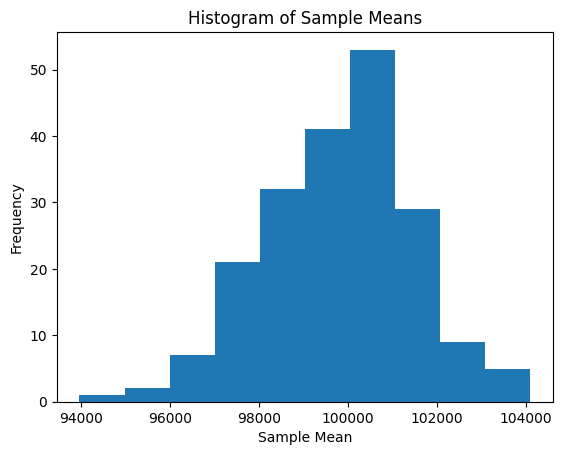


For CI of 0.85 with sample size 1000
Actual Mean: 99956.5108
Mean of Samples: 99987.796008
Confidence Interval: 99956.5108 +- 56.85370296803298


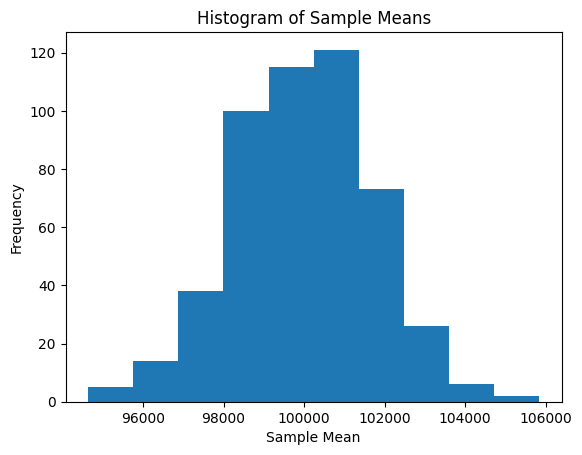


For CI of 0.85 with sample size 1000
Actual Mean: 99956.5108
Mean of Samples: 99937.990279
Confidence Interval: 99956.5108 +- 54.914028564308566


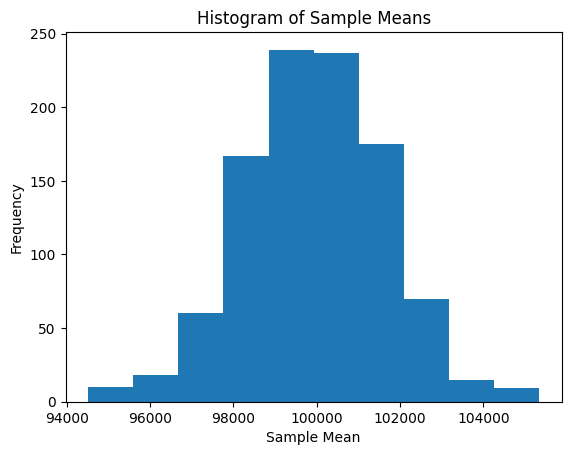

In [ ]:
# Varying number of samples while keeping sample size constant at 1000
CI(pop, 0.85, 1000, 200)
CI(pop, 0.85, 1000, 500)
CI(pop, 0.85, 1000, 1000)


For CI of 0.85 with sample size 100
Actual Mean: 99956.5108
Mean of Samples: 99641.02566
Confidence Interval: 99956.5108 +- 580.1755785066063


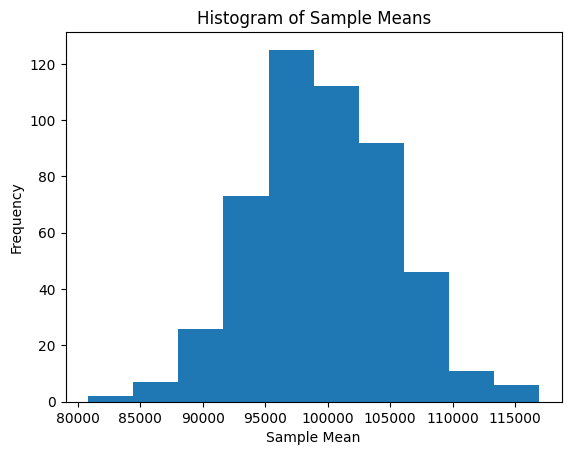


For CI of 0.85 with sample size 500
Actual Mean: 99956.5108
Mean of Samples: 99930.471756
Confidence Interval: 99956.5108 +- 120.42584431944036


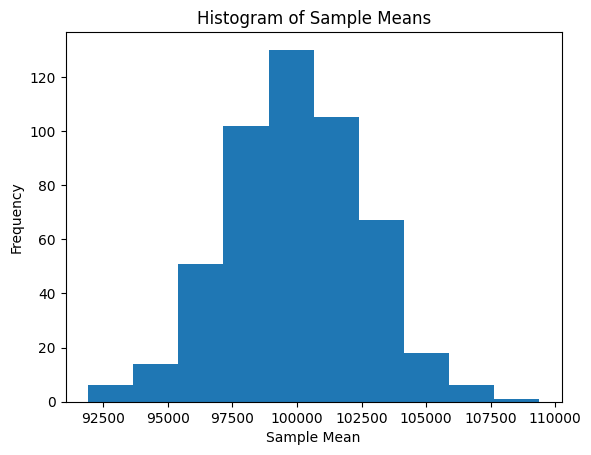


For CI of 0.85 with sample size 1000
Actual Mean: 99956.5108
Mean of Samples: 99973.25951199999
Confidence Interval: 99956.5108 +- 53.62634799295075


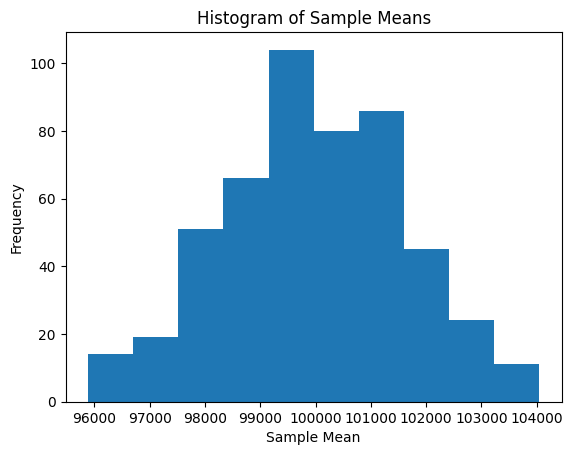

In [ ]:
# Varying sample size while keeping number of samples constant at 500
CI(pop, 0.85, 100, 500)
CI(pop, 0.85, 500, 500)
CI(pop, 0.85, 1000, 500)

I've written about it [here](https://namitalearns.substack.com) too!